**The Fusion of Multimodal Sentiment Insights for Financial Market Forecasting**

1. Setting Up Environment:

Install Tesseract in Colab

In [8]:
# Install Tesseract OCR
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,031 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
G

In [9]:
# Install required libraries
!pip install PyMuPDF pytesseract transformers torch torchvision pdf2image pandas matplotlib seaborn
!apt-get install -y poppler-utils  # For PDF to image conversion (used by pdf2image)

import fitz  # PyMuPDF
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
import pandas as pd
import torch
from transformers import pipeline
from torchvision import models, transforms
import matplotlib.pyplot as plt



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


2. Input Data:

In [4]:
from google.colab import files

# Upload PDF
uploaded = files.upload()

# Assuming the PDF is named 'financial_report.pdf'
pdf_path = list(uploaded.keys())[0]


Saving financial_report.pdf to financial_report.pdf


**3. Extract Text from the PDF**

We use PyMuPDF (fitz) to extract text from the PDF.

In [10]:
# Open the PDF
doc = fitz.open(pdf_path)

# Extract text from all pages
all_text = ""
for page_num in range(doc.page_count):
    page = doc.load_page(page_num)
    all_text += page.get_text("text")

print("Extracted Text: ", all_text[:500])  # Show the first 500 characters of extracted text


Extracted Text:  NIFTY NEXT 50
208.15 (0.28%)
NIFTY MIDCAP
SELECT
54.00 (0.41%)
NIFTY BANK
89.10 (0.17%)
NIFTY FINANC
SERVICES
5.90 (0.02%)
NSE
Indices
Equities
Derivatives
Reference
Rates
Market
Turnover
Complaints &
Reporting
View All Indices
Filter Indices 
NIFTY 50
-70.60 (-0.28%)
25,057.35
75,859.85
13,152.20
51,906.00
23,863.45
TOP 5 STOCKS - NIFTY 50
GAINERS/LOSERS
MOST ACTIVE
SYMBOL
LTP
%CHNG
VOLUME
BPCL
349.35
2.52
1,71,83,945
ICICIBANK
1256
1.97
1,16,57,338
BHARTIARTL
1718
1.32
58,91,334
BRITANNIA
605


**4. Extract Images, Logos, and Graphs from the PDF**

In [11]:
# Convert PDF pages to images
pages = convert_from_path(pdf_path, 300)

# Save and display the images extracted from the PDF
for i, page in enumerate(pages):
    image_name = f'page_{i + 1}.png'
    page.save(image_name, 'PNG')
    print(f"Saved {image_name}")

# Use pytesseract to extract text from the images (for graphs and logos)
for i, page in enumerate(pages):
    page_text = pytesseract.image_to_string(page)
    print(f"Extracted Text from Page {i + 1} Image: {page_text[:500]}")


Saved page_1.png
Saved page_2.png
Saved page_3.png
Saved page_4.png
Saved page_5.png
Extracted Text from Page 1 Image:  

oye} tela men nr-lin} | Listings | IPO | Circulars Daily Reports Hae) CoE yes) | Press Releases | Contact Us
25,057.35
qV N S E Search by company name, symbol or keyword English v JV Nifty
. 15-Oct-2024 15:30
ABOUT MARKET INVEST LIST TRADE REGULATION LEARN RESOURCES COMPLAINT
DATA
Rates Turnover Rees h¥ng
NIFTY 50 NIFTY NEXT 50 NIFTY MIDCAP NIFTY BANK NIFTY FIN
25,057.35 75,859.85 a SELECT 51,906.00 a SERVICES
208.15 (0.28%) 13,152.20 a 89.10 (0.17%) 23,863.45
54.00 (0.41%) 5.90 (0.02%)
>
Upd
Extracted Text from Page 2 Image: oye} tela men nr-lin} | Listings | IPO | Circulars | Daily Reports | Hae) CoE yes) | Press Releases | Contact Us

 

25,057.35

CONSE) Minsitys0 me2t020

HOME ABOUT MARKET INVEST LIST TRADE REGULATION LEARN RESOURCES COMPLAINT

DATA
HINDALCO 726.75 -2.19 30,56,619 =|

View All >

Corporate Announcements

 

Board Meetings

Corporate Actions

 


**5. Extract Tables from the PDF**

We can extract tables either using PyMuPDF directly or convert the pages to images and use pytesseract to identify the table structure.

In [12]:
# Extract tables using OCR (optical character recognition) on the pages' images
table_data = []

for i, page in enumerate(pages):
    page_table = pytesseract.image_to_string(page, config='--psm 12')  # Configuration for tables
    table_data.append(page_table)
    print(f"Table Data from Page {i + 1}: {page_table[:500]}")

# If tables are in structured format (CSV-like), they can be processed as follows:
# For example, pandas can read table-like structures:
# table_df = pd.read_csv(io.StringIO(table_data[0]))  # Assuming the table on page 1 is CSV-like


Table Data from Page 1: Daily Reports

oye} tela men nr-lin} | Listings | IPO | Circulars

Hae) CoE yes) | Press Releases | Contact Us

25,057.35

qV N S E Search by company name, symbol or keyword

English v IN Nifty

15-Oct-2024 15:30

ABOUT MARKET

INVEST

LIST TRADE

REGULATION

LEARN RESOURCES COMPLAINT

DATA

Rates

Turnover

Rees h¥ng

NIFTY 50

NIFTY NEXT 50

NIFTY MIDCAP

NIFTY BANK

NIFTY FIN

25,057.35

75,859.85

a

SELECT

51,906.00

a

SERVICES

a

208.15 (0.28%)

13,152.20

89.10 (0.17%)

23,863.45

54.0
Table Data from Page 2: oye} tela men nr-lin} | Listings | IPO | Circulars | Daily Reports | Hae) CoE yes) | Press Releases | Contact Us

25,057.35

-70.60 (-0.28%)

15-Oct-2024 15:30

QNSE SD) Ni

HOME ABOUT MARKET

INVEST

LIST TRADE

REGULATION

LEARN RESOURCES COMPLAINT

DATA

BAJFINANCE

7029.8

-2.48

14,85,567

Oyo) ert Or coli

Lower Circuit

HINDALCO

726.75

-2.19

30,56,619

B

114

63

View All >

Corporate Announcements

Board Meetings

Corporate Actions

HD

**6. Analyze Sentiment from Extracted Text**

We'll apply sentiment analysis to the extracted text using Huggingface's transformers library.

In [13]:
# Use Huggingface's sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Analyze the first 1000 characters of the extracted text
text_sentiment = sentiment_pipeline(all_text[:1000])
print("Sentiment Analysis Result: ", text_sentiment)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Sentiment Analysis Result:  [{'label': 'NEGATIVE', 'score': 0.9943575263023376}]


**7. Analyze Extracted Images with CNN**

We can load a pre-trained deep learning model (like ResNet) to analyze images, graphs, and logos.

In [14]:
# Load a pre-trained CNN model (e.g., ResNet)
model = models.resnet50(pretrained=True)
model.eval()

# Preprocess images for model input
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Analyze one of the images (e.g., the first page)
input_image = preprocess(pages[0]).unsqueeze(0)  # Add batch dimension

# Analyze with CNN model
with torch.no_grad():
    output = model(input_image)

# Get predicted class for the image
_, predicted_class = torch.max(output, 1)
print("Predicted Image Class: ", predicted_class.item())


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 30.9MB/s]


Predicted Image Class:  916


**8. Feature Fusion for Prediction**

Now, combine the extracted features (text sentiment, image analysis, and table data) to build a predictive model for financial market forecasting.

Here’s a basic idea for feature fusion:



1.   Text sentiment will provide emotional insights.
2.   Image analysis (e.g., CNN model) will give visual patterns from graphs and logos.
3.   Table data can be treated as structured data for numerical insights.


For prediction, you could use a model like RandomForest or XGBoost, depending on the data format.

In [15]:
# Simulate feature fusion (combine text sentiment score, image analysis class, and table data)
features = {
    'text_sentiment_score': text_sentiment[0]['score'],
    'image_predicted_class': predicted_class.item(),
    'table_data_value': 123  # Simulated value from table data
}

# Create a DataFrame for modeling
features_df = pd.DataFrame([features])
print(features_df)

# You can now train a model (e.g., RandomForest) using this data for market prediction
from sklearn.ensemble import RandomForestRegressor

# Simulate target variable (e.g., market trend percentage)
target = [0.05]  # Simulated market prediction trend

# Train a RandomForest model
model = RandomForestRegressor()
model.fit(features_df, target)

# Predict the market trend
prediction = model.predict(features_df)
print("Market Prediction: ", prediction)


   text_sentiment_score  image_predicted_class  table_data_value
0              0.994358                    916               123
Market Prediction:  [0.05]


**9. Visualization and Forecasting**

We can use libraries like Matplotlib or Seaborn to visualize the predictions and results.

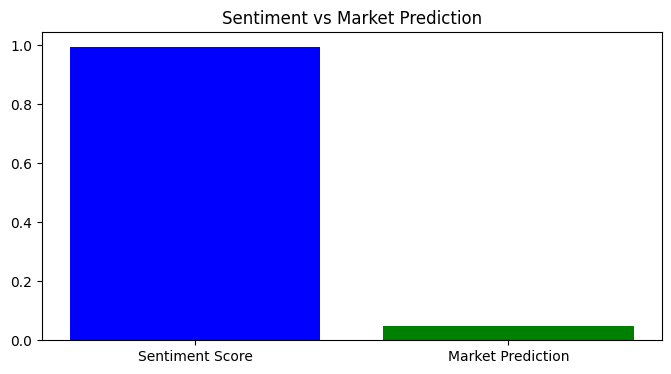

In [16]:
# Visualize the sentiment analysis and prediction results
plt.figure(figsize=(8, 4))

# Plot sentiment score
plt.bar(['Sentiment Score'], [features['text_sentiment_score']], color='blue')

# Plot market prediction
plt.bar(['Market Prediction'], prediction, color='green')

plt.title('Sentiment vs Market Prediction')
plt.show()
